In [213]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

info=pd.read_csv('C:/Users/gram/Downloads/open/data_info.csv')

In [214]:
info

,변수명,변수 설명
0,id,아이디
1,base_date,날짜
2,day_of_week,요일
3,base_hour,시간대
4,road_in_use,도로사용여부
5,lane_count,차로수
6,road_rating,도로등급
7,multi_linked,중용구간 여부
8,connect_code,연결로 코드
9,maximum_speed_limit,최고속도제한


In [215]:
train=pd.read_csv('C:/Users/gram/Downloads/open/train.csv')

In [216]:
train.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


In [217]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              object 
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  object 
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    object 
 22  target            

In [218]:
#데이터의 크기가 커 줄일 수 있는 컬럼 있는지 확인
for column in train.columns:
    print(column, train[column].min(), train[column].max())

id TRAIN_0000000 TRAIN_4701216
base_date 20210901 20220731
day_of_week 금 화
base_hour 0 23
lane_count 1 3
road_rating 103 107
road_name - 호서중앙로
multi_linked 0 1
connect_code 0 103
maximum_speed_limit 30.0 80.0
vehicle_restricted 0.0 0.0
weight_restricted 0.0 50000.0
height_restricted 0.0 0.0
road_type 0 3
start_node_name BYC 흘천5교
start_latitude 33.2434317486804 33.5560801767072
start_longitude 126.182616549771 126.930940973848
start_turn_restricted 없음 있음
end_node_name BYC 흘천5교
end_latitude 33.2434317486804 33.5560801767072
end_longitude 126.182616549771 126.930940973848
end_turn_restricted 없음 있음
target 1.0 113.0


In [219]:
#컬럼별 크기 줄이기
train['base_hour']=train['base_hour'].astype(np.int8)
train['lane_count']=train['lane_count'].astype(np.int8)
train['road_rating']=train['road_rating'].astype(np.int8)
train['multi_linked']=train['multi_linked'].astype(np.int8)
train['connect_code']=train['connect_code'].astype(np.int8)
train['road_type']=train['road_type'].astype(np.int8)
train['height_restricted']=train['height_restricted'].astype(np.int8)
train['vehicle_restricted']=train['vehicle_restricted'].astype(np.int8)
train['maximum_speed_limit']=train['maximum_speed_limit'].astype(np.int8)
train['target']=train['target'].astype(np.int8)


In [220]:
# 데이터 크기 확인
train.shape

(4701217, 23)

In [221]:
#컬럼별 분포 확인

for x in train.columns:
    print(x, '값 분포 :\n ', train[x].value_counts(), '\n')

id 값 분포 :
  TRAIN_0000000    1
TRAIN_3134142    1
TRAIN_3134148    1
TRAIN_3134147    1
TRAIN_3134146    1
                ..
TRAIN_1567079    1
TRAIN_1567080    1
TRAIN_1567081    1
TRAIN_1567082    1
TRAIN_4701216    1
Name: id, Length: 4701217, dtype: int64 

base_date 값 분포 :
  20220603    20544
20220504    20460
20220602    20441
20220626    20429
20220609    20415
            ...  
20220315     2163
20211107     2071
20220730     1845
20220519     1558
20220518     1555
Name: base_date, Length: 281, dtype: int64 

day_of_week 값 분포 :
  금    684024
수    675583
목    674070
일    673632
토    669767
화    662498
월    661643
Name: day_of_week, dtype: int64 

base_hour 값 분포 :
  15    214541
13    214297
14    214182
12    211833
19    209870
11    208515
16    208420
17    208377
18    207500
10    206316
9     205327
20    205059
21    203585
8     201875
22    200629
7     199061
6     189418
23    184229
1     182353
5     181128
2     169322
4     165284
3     155938
0     154158
Name:

In [222]:
#컬럼 제거
train=train[train.columns.difference(
    ['id',
     'vehicle_restricted',
     'height_restricted',
     'start_latitude',
     'start_longitude',
     'end_latitude',
     'end_longitude',
     'start_node_name',
     'end_node_name'])]

In [223]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 14 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   base_date              int64  
 1   base_hour              int8   
 2   connect_code           int8   
 3   day_of_week            object 
 4   end_turn_restricted    object 
 5   lane_count             int8   
 6   maximum_speed_limit    int8   
 7   multi_linked           int8   
 8   road_name              object 
 9   road_rating            int8   
 10  road_type              int8   
 11  start_turn_restricted  object 
 12  target                 int8   
 13  weight_restricted      float64
dtypes: float64(1), int64(1), int8(8), object(4)
memory usage: 251.1+ MB


In [224]:
# 결측치 확인
train.isnull().sum()

base_date                0
base_hour                0
connect_code             0
day_of_week              0
end_turn_restricted      0
lane_count               0
maximum_speed_limit      0
multi_linked             0
road_name                0
road_rating              0
road_type                0
start_turn_restricted    0
target                   0
weight_restricted        0
dtype: int64

In [225]:
#결측치 제거 
train=train[train['road_name']!='-']

In [226]:
#숫자형 변수의 컬럼명
n_cols=train.describe().columns.tolist()

<AxesSubplot:>

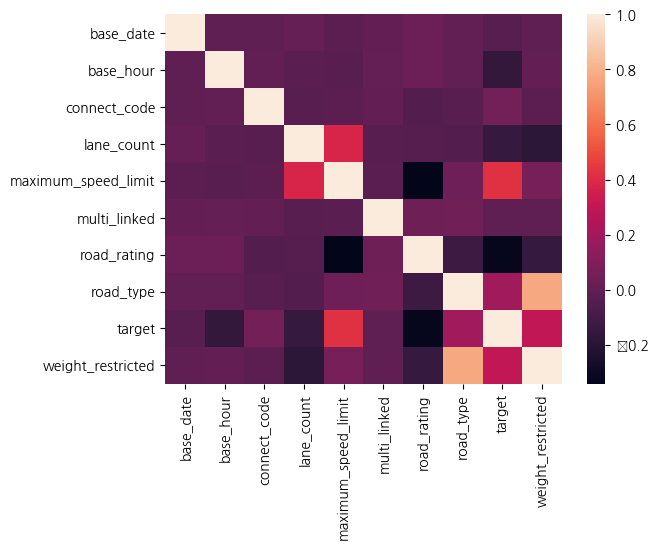

In [227]:
#변수 간 상관관계 확인
import seaborn as sns

sns.heatmap(train[n_cols].corr())

In [228]:
#base_date 컬럼 문자형 -> 숫자형 변환
train['base_date']=train['base_date'].astype(str)

In [229]:
#base_date 날짜형 변수로 변환

train.base_date=pd.to_datetime(train.base_date)

In [230]:
#base_date에서 month(월) 컬럼 생성
train['month']=train['base_date'].dt.month

<AxesSubplot:xlabel='month', ylabel='target'>

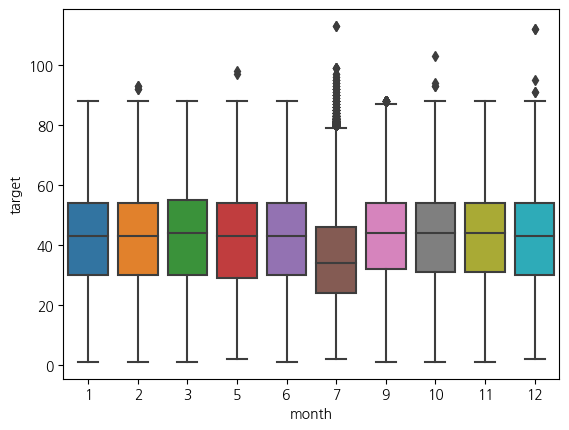

In [231]:
# 월별 속도분포 확인
import seaborn as sns

sns.boxplot(data=train, x='month', y='target')

<AxesSubplot:xlabel='base_hour', ylabel='target'>

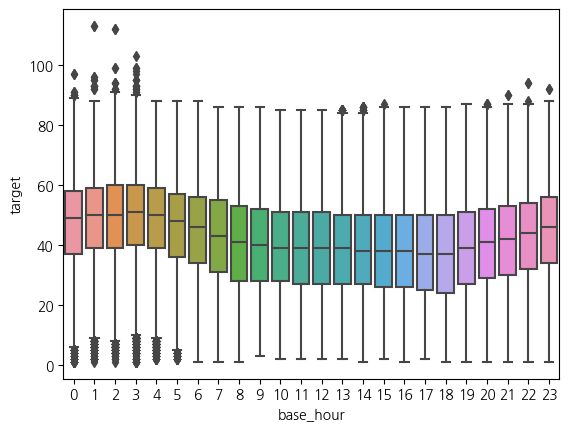

In [232]:
#시간대별 속도 분포
sns.boxplot(data=train, x='base_hour', y='target')

<AxesSubplot:xlabel='day_of_week', ylabel='target'>

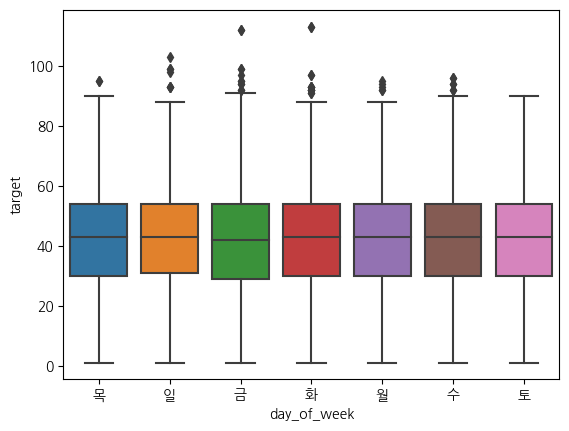

In [233]:
#요일별 속도 분포
plt.rcParams['font.family'] = 'NanumGothic' #한글 깨짐 방지

sns.boxplot(data=train, x='day_of_week', y='target')

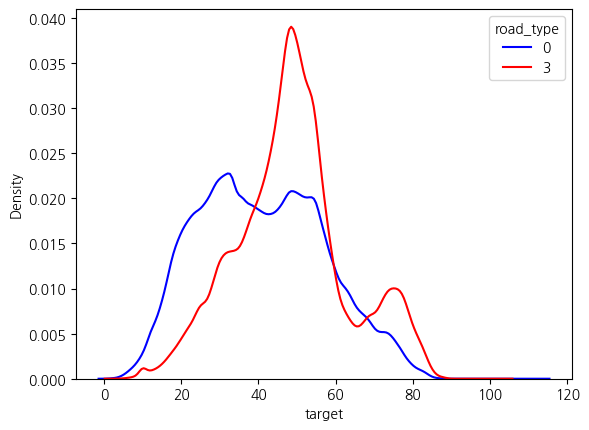

In [234]:
#도로유형별 속도 분포
sns.distplot(train[train.road_type == 0]["target"], color="blue", label="0", hist=False)
sns.distplot(train[train.road_type == 3]["target"], color="red", label="3",hist=False)
plt.legend(title="road_type")
plt.show()

<AxesSubplot:xlabel='maximum_speed_limit', ylabel='target'>

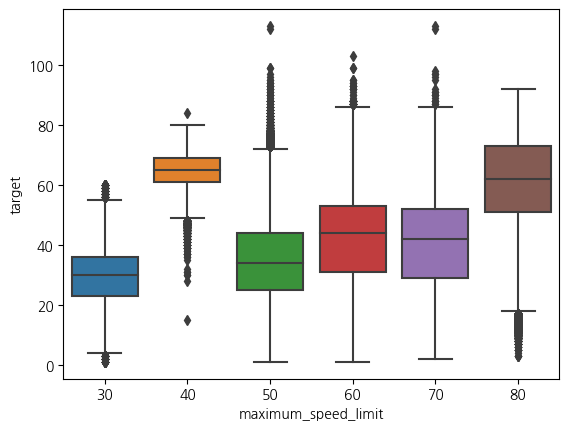

In [235]:
#제한속도별 속도 분포
sns.boxplot(data=train, x='maximum_speed_limit', y='target')


<AxesSubplot:xlabel='weight_restricted', ylabel='target'>

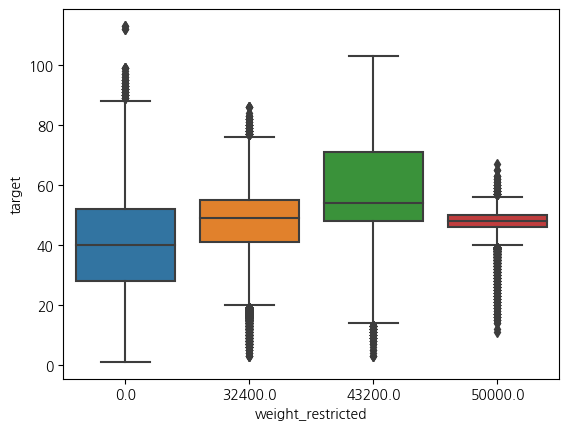

In [236]:
# 통과제한하중별 속도 분포
sns.boxplot(data=train, x='weight_restricted', y='target')

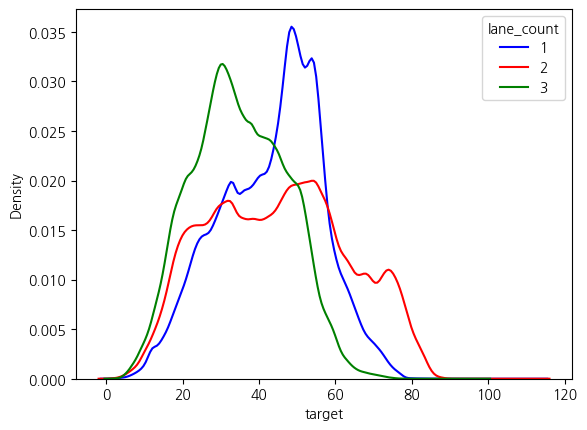

In [237]:
#차로수별 속도 분포
sns.distplot(train[train.lane_count == 1]["target"], color="blue", label="1", hist=False)
sns.distplot(train[train.lane_count == 2]["target"], color="red", label="2",hist=False)
sns.distplot(train[train.lane_count == 3]["target"], color="green", label="3",hist=False)
plt.legend(title="lane_count")
plt.show()

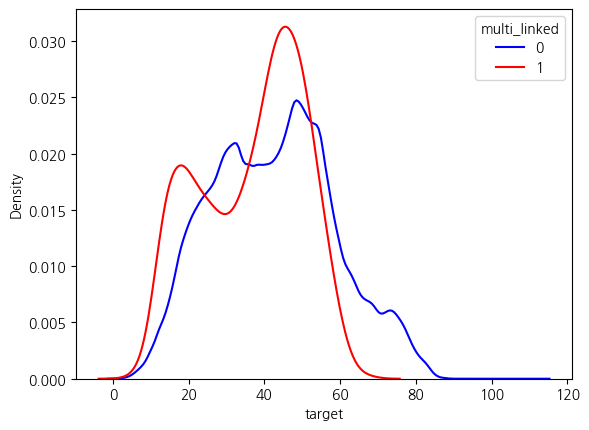

In [238]:
#중용구간여부별 속도 분포
sns.distplot(train[train.multi_linked == 0]["target"], color="blue", label="0", hist=False)
sns.distplot(train[train.multi_linked == 1]["target"], color="red", label="1",hist=False)
plt.legend(title="multi_linked")
plt.show()

<AxesSubplot:xlabel='road_rating', ylabel='target'>

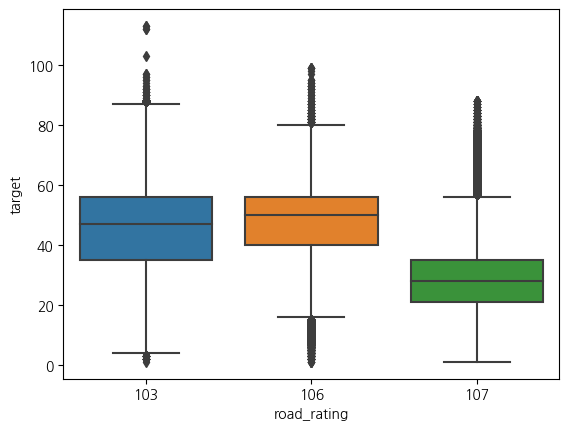

In [239]:
# 도로등급별 속도분포
sns.boxplot(data=train, x='road_rating', y='target')

In [240]:
#이상치 확인
train.describe()

# connect_code, weight_restricted, road_type에 이상치 존재 확인

,base_hour,connect_code,lane_count,maximum_speed_limit,multi_linked,road_rating,road_type,target,weight_restricted,month
count,4.131754e+06,4.131754e+06,4.131754e+06,4.131754e+06,4.131754e+06,4.131754e+06,4.131754e+06,4.131754e+06,4.131754e+06,4.131754e+06
mean,1.187150e+01,3.026865e-01,1.873600e+00,6.176754e+01,5.419006e-04,1.046771e+02,6.364706e-01,4.251470e+01,5.529066e+03,6.301117e+00
std,6.749225e+00,5.575401e+00,7.022213e-01,1.164130e+01,2.327245e-02,1.788598e+00,1.226506e+00,1.616284e+01,1.382777e+04,3.763730e+00
min,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+01,0.000000e+00,1.030000e+02,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,6.000000e+00,0.000000e+00,1.000000e+00,5.000000e+01,0.000000e+00,1.030000e+02,0.000000e+00,3.000000e+01,0.000000e+00,3.000000e+00
50%,1.200000e+01,0.000000e+00,2.000000e+00,6.000000e+01,0.000000e+00,1.030000e+02,0.000000e+00,4.300000e+01,0.000000e+00,6.000000e+00
75%,1.800000e+01,0.000000e+00,2.000000e+00,7.000000e+01,0.000000e+00,1.060000e+02,0.000000e+00,5.400000e+01,0.000000e+00,1.000000e+01
max,2.300000e+01,1.030000e+02,3.000000e+00,8.000000e+01,1.000000e+00,1.070000e+02,3.000000e+00,1.130000e+02,5.000000e+04,1.200000e+01


In [241]:
# minmaxscaling 실시 (정규분포가 아니거나 표준편차가 작을 때 효과적)

from sklearn.preprocessing import MinMaxScaler

mm=MinMaxScaler()

mm.fit(train[['connect_code', 'weight_restricted', 'road_type']])
train[['connect_code', 'weight_restricted', 'road_type']]=mm.transform(train[['connect_code', 'weight_restricted', 'road_type']])

# 카테고리형 데이터를 수치형 데이터로 변환

In [242]:
#day_of_week(요일), start_turn_restricted(시작 지점의 회전제한 유무), end_turn_restricted(도착 지점의 회전 제한 유무)의 LabelEncoding 실시


from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

train['day_of_week'] = le.fit_transform(train['day_of_week'])
train['start_turn_restricted'] = le.fit_transform(train['start_turn_restricted'])
train['end_turn_restricted'] = le.fit_transform(train['end_turn_restricted'])


In [243]:
train['road_name'].unique()
#일반국도, 지방도, ~로, ~교, ~길 로 카테고리 구분

array(['지방도1112호선', '일반국도11호선', '일반국도16호선', '태평로', '일반국도12호선', '경찰로',
       '외도천교', '일반국도99호선', '중정로', '번영로', '연동로', '중산간서로', '지방도1118호선',
       '새서귀로', '지방도1115호선', '지방도1132호선', '어시천교', '지방도1120호선', '삼무로',
       '애조로', '지방도1116호선', '일반국도95호선', '동부관광도로', '동홍로', '지방도97호선', '중문로',
       '연삼로', '중앙로', '산서로', '지방도1117호선', '연북로', '남조로', '지방도1119호선', '동문로',
       '한천로', '삼봉로', '고평교', '연북2교', '관광단지로', '권학로', '시청로', '신대로', '서사로',
       '관덕로', '관광단지1로', '신산로', '관광단지2로', '신광로', '지방도1136호선', '첨단로',
       '제2거로교', '시민광장로', '임항로', '수영장길', '애원로', '삼성로', '일주동로', '호서중앙로',
       '아봉로', '호근로'], dtype=object)

In [244]:
train.loc[train['road_name'].str.contains('일반국도'),'road_name']='일반국도'
train.loc[train['road_name'].str.contains('지방도'),'road_name']='지방도'
train.loc[train['road_name'].str.contains('교'),'road_name']='교'
train.loc[train['road_name'].str.contains('로'),'road_name']='로'
train.loc[train['road_name'].str.contains('길'),'road_name']='길'

In [245]:
train['road_name'].unique()

array(['지방도', '일반국도', '로', '교', '길'], dtype=object)

In [251]:
#원핫인코딩
train=pd.get_dummies(train, columns=["road_name"])

In [252]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4131754 entries, 0 to 4701216
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   base_date              datetime64[ns]
 1   base_hour              int8          
 2   connect_code           float64       
 3   day_of_week            int32         
 4   end_turn_restricted    int32         
 5   lane_count             int8          
 6   maximum_speed_limit    int8          
 7   multi_linked           int8          
 8   road_rating            int8          
 9   road_type              float64       
 10  start_turn_restricted  int32         
 11  target                 int8          
 12  weight_restricted      float64       
 13  month                  int64         
 14  road_name_교            uint8         
 15  road_name_길            uint8         
 16  road_name_로            uint8         
 17  road_name_일반국도         uint8         
 18  road_name_지방도         